In [1]:
import piplite 
await piplite.install('seaborn')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [3]:
#Load the data

In [4]:
data = pd.read_csv('25 iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#clustering iris by sepal

<function matplotlib.pyplot.show(close=None, block=None)>

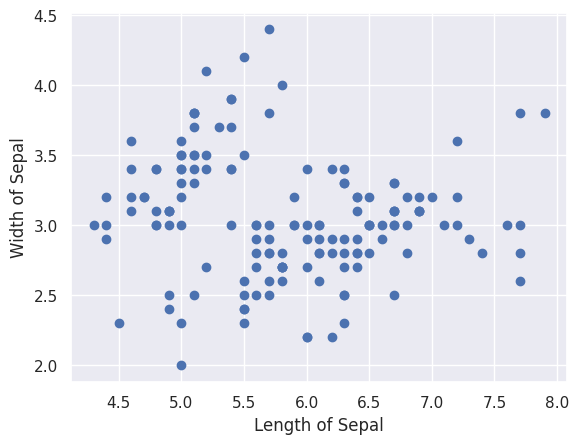

In [6]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal')
plt.show

In [7]:
#Clustering

In [8]:
#Create variable for data clustering

In [9]:
x = data.copy()

In [10]:
kmeans = KMeans(2)

In [11]:
kmeans.fit(x)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


KMeans(n_clusters=2)

In [12]:
clusters = data.copy()

In [13]:
clusters['Pred_Cluster'] = kmeans.fit_predict(x)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


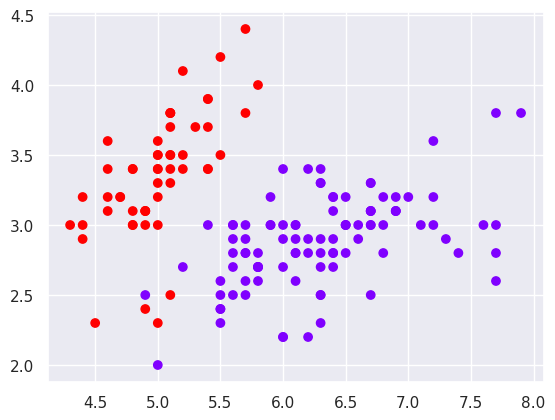

In [14]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['Pred_Cluster'], cmap='rainbow')

In [15]:
#Try standardize variables

In [16]:
#import preprocessing from sklearn

In [17]:
from sklearn import preprocessing

In [18]:
x_scaled = preprocessing.scale(data)

In [20]:
#Clustering with standardize dataset

In [21]:
kmeans_scaled = KMeans(2)

In [22]:
kmeans_scaled.fit(x_scaled)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [23]:
clusters_scaled = data.copy()

In [24]:
clusters_scaled['Predicted_clusters'] = kmeans_scaled.fit_predict(x_scaled)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


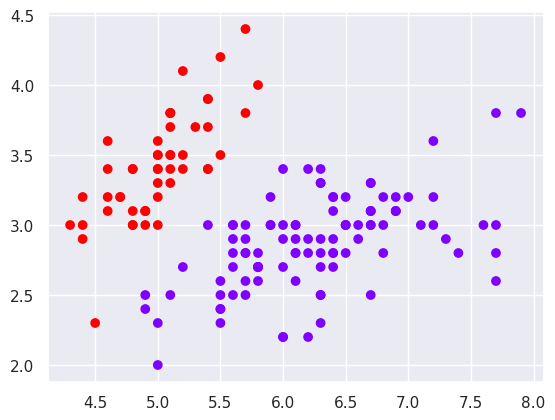

In [25]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c=clusters_scaled['Predicted_clusters'], cmap='rainbow')

In [26]:
#Elbow method

In [27]:
#WCSS

In [28]:
wcss = []

In [30]:
cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.5511767079852,
 91.08507916275063,
 81.94064746519818,
 72.09745458223752,
 63.9117373257069,
 55.664087846522065]

Text(0.5, 1.0, 'The Elbow Method')

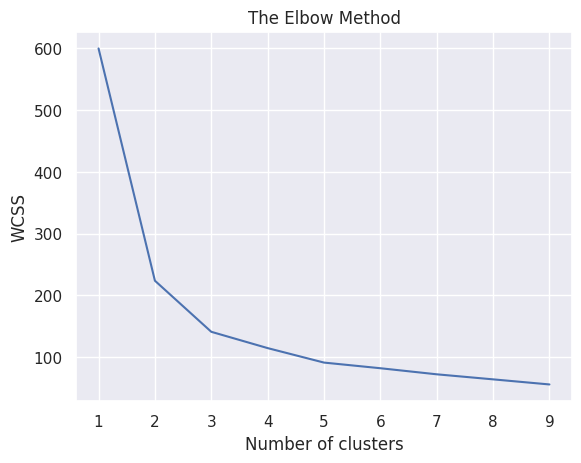

In [31]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

In [32]:
#from elbow method we can take advantage that the best cluster numbers are 2 or 3 clusters